# CAROLINA DATA CHALLENGE - ANMOL RATNA PANT & WORTH PAGE

In [152]:
#Loading Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [154]:
#Reading the files for both years
new_data1 = pd.read_csv("CDC Finance Dataset_2018.csv")
new_data2 = pd.read_csv("CDC Finance Dataset_2019.csv")

In [165]:
#Appending both files to get a single file using append
new_data = new_data1.append(new_data2)

In [166]:
#Scrutinizing through the columns
new_data.columns

Index(['activity_year', 'lei', 'derived_msa-md', 'state_code', 'county_code',
       'census_tract', 'conforming_loan_limit', 'derived_loan_product_type',
       'derived_dwelling_category', 'derived_ethnicity', 'derived_race',
       'derived_sex', 'action_taken', 'purchaser_type', 'preapproval',
       'loan_type', 'loan_purpose', 'lien_status', 'reverse_mortgage',
       'open-end_line_of_credit', 'business_or_commercial_purpose',
       'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'rate_spread',
       'hoepa_status', 'total_loan_costs', 'total_points_and_fees',
       'origination_charges', 'discount_points', 'lender_credits', 'loan_term',
       'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'property_value', 'construction_method',
       'occupancy_type', 'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'total_

In [167]:
#Choosing Relevant columns
finance = new_data[['activity_year','lei','derived_race','loan_to_value_ratio','loan_term','income','loan_amount',
                    'county_code','derived_dwelling_category','conforming_loan_limit','derived_ethnicity','derived_sex',
                   'preapproval','loan_type','loan_purpose','business_or_commercial_purpose','hoepa_status',
                   'property_value','debt_to_income_ratio',
                   'applicant_credit_score_type','applicant_age','action_taken']]

In [168]:
#Modifying data entries in Banks column
finance.lei.replace("AD6GFRVSDT01YPT1CS68","PNC Bank",inplace=True)
finance.lei.replace("B4TYDEB6GKMZO031MB27","Bank of America",inplace=True)
finance.lei.replace("KB1H1DSPRFMYMCUFXT09","Wells Fargo Bank",inplace=True)

In [169]:
#Modying Dependent Variable for Loan Approval(1) and Denial(0)
finance.action_taken.replace(2,6,inplace=True)
finance.action_taken.replace(3,0,inplace=True)
finance.action_taken.replace(6,1,inplace=True)
finance.action_taken.value_counts()

1    34408
0    24522
Name: action_taken, dtype: int64

In [170]:
# 0 - Bank of America
# 1 - PNC Bank
# 2 - Wells Fargo Bank
#Counting the loan amount offered in both years
finance.groupby(by='lei')['loan_amount'].count()

lei
Bank of America     16796
PNC Bank             6094
Wells Fargo Bank    36040
Name: loan_amount, dtype: int64

In [171]:
#checking for catagorical variables
finance.select_dtypes(include=['object'])

,lei,derived_race,derived_dwelling_category,conforming_loan_limit,derived_ethnicity,derived_sex,debt_to_income_ratio,applicant_age
0,PNC Bank,Black or African American,Single Family (1-4 Units):Site-Built,C,Not Hispanic or Latino,Female,NaN,65-74
1,PNC Bank,White,Single Family (1-4 Units):Site-Built,C,Not Hispanic or Latino,Joint,20%-<30%,45-54
2,PNC Bank,White,Single Family (1-4 Units):Site-Built,C,Not Hispanic or Latino,Joint,<20%,45-54
3,PNC Bank,White,Single Family (1-4 Units):Site-Built,C,Not Hispanic or Latino,Joint,>60%,45-54
4,PNC Bank,White,Single Family (1-4 Units):Site-Built,C,Not Hispanic or Latino,Joint,NaN,55-64
5,PNC Bank,White,Single Family (1-4 Units):Site-Built,C,Not Hispanic or Latino,Male,NaN,35-44
6,PNC Bank,White,Single Family (1-4 Units):Site-Built,NC,Not Hispanic or Latino,Male,<20%,45-54
7,PNC Bank,White,Single Family (1-4 Units):Site-Built,C,Not Hispanic or Latino,Male,40,35-44
8,PNC Bank,White,Single Family (1-4 Units):Site-Built,NC,Not Hispanic or Latino,Joint,20%-<30%,45-54
9,PNC Bank,White,Single Family (1-4 Units):Site-Built,C,Hispanic or Latino,Joint,>60%,35-44


In [172]:
#Modification on NAN Values and substituting them with mean or values with maximum occurence
print(finance[finance.isnull().any(axis=1) !='NaN'].count())
finance = finance.fillna({"debt_to_income_ratio": "50"})
finance = finance.fillna({"conforming_loan_limit": "C"})
finance = finance.fillna({"loan_to_value_ratio": finance.loan_to_value_ratio.mean()})
finance = finance.fillna({"property_value": finance.property_value.mean()})
finance = finance.fillna({"income": finance.income.mean()})
finance = finance.fillna({"loan_term": finance.loan_term.mean()})

activity_year                     58930
lei                               58930
derived_race                      58930
loan_to_value_ratio               45131
loan_term                         58921
income                            55381
loan_amount                       58930
county_code                       58930
derived_dwelling_category         58930
conforming_loan_limit             58916
derived_ethnicity                 58930
derived_sex                       58930
preapproval                       58930
loan_type                         58930
loan_purpose                      58930
business_or_commercial_purpose    58930
hoepa_status                      58930
property_value                    56626
debt_to_income_ratio              45448
applicant_credit_score_type       58930
applicant_age                     58930
action_taken                      58930
dtype: int64


In [173]:
#Rechecking for missing values
finance[finance.isnull().any(axis=1) !='NaN'].count()

activity_year                     58930
lei                               58930
derived_race                      58930
loan_to_value_ratio               58930
loan_term                         58930
income                            58930
loan_amount                       58930
county_code                       58930
derived_dwelling_category         58930
conforming_loan_limit             58930
derived_ethnicity                 58930
derived_sex                       58930
preapproval                       58930
loan_type                         58930
loan_purpose                      58930
business_or_commercial_purpose    58930
hoepa_status                      58930
property_value                    58930
debt_to_income_ratio              58930
applicant_credit_score_type       58930
applicant_age                     58930
action_taken                      58930
dtype: int64

In [64]:
#Exporting the new modified dataset for visualization on Tableau
finance.to_excel("CDC Finance Dataset.xlsx")
finance.shape

(58930, 22)

In [174]:
#Converting Catagorical to Numeric Encoded Values
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
finance["lei"] = lb.fit_transform(finance["lei"])
finance["derived_race"] = lb.fit_transform(finance["derived_race"])
finance["derived_dwelling_category"] = lb.fit_transform(finance["derived_dwelling_category"])
finance["conforming_loan_limit"] = lb.fit_transform(finance["conforming_loan_limit"])
finance["derived_ethnicity"] = lb.fit_transform(finance["derived_ethnicity"])
finance["derived_sex"] = lb.fit_transform(finance["derived_sex"])
finance["applicant_age"] = lb.fit_transform(finance["applicant_age"])
finance["debt_to_income_ratio"] = lb.fit_transform(finance["debt_to_income_ratio"])
finance.drop('activity_year',axis=1,inplace=True)

[Text(0.5, 0, 'lei'),
 Text(1.5, 0, 'derived_race'),
 Text(2.5, 0, 'loan_to_value_ratio'),
 Text(3.5, 0, 'loan_term'),
 Text(4.5, 0, 'income'),
 Text(5.5, 0, 'loan_amount'),
 Text(6.5, 0, 'county_code'),
 Text(7.5, 0, 'derived_dwelling_category'),
 Text(8.5, 0, 'conforming_loan_limit'),
 Text(9.5, 0, 'derived_ethnicity'),
 Text(10.5, 0, 'derived_sex'),
 Text(11.5, 0, 'preapproval'),
 Text(12.5, 0, 'loan_type'),
 Text(13.5, 0, 'loan_purpose'),
 Text(14.5, 0, 'business_or_commercial_purpose'),
 Text(15.5, 0, 'hoepa_status'),
 Text(16.5, 0, 'property_value'),
 Text(17.5, 0, 'debt_to_income_ratio'),
 Text(18.5, 0, 'applicant_credit_score_type'),
 Text(19.5, 0, 'applicant_age'),
 Text(20.5, 0, 'action_taken')]

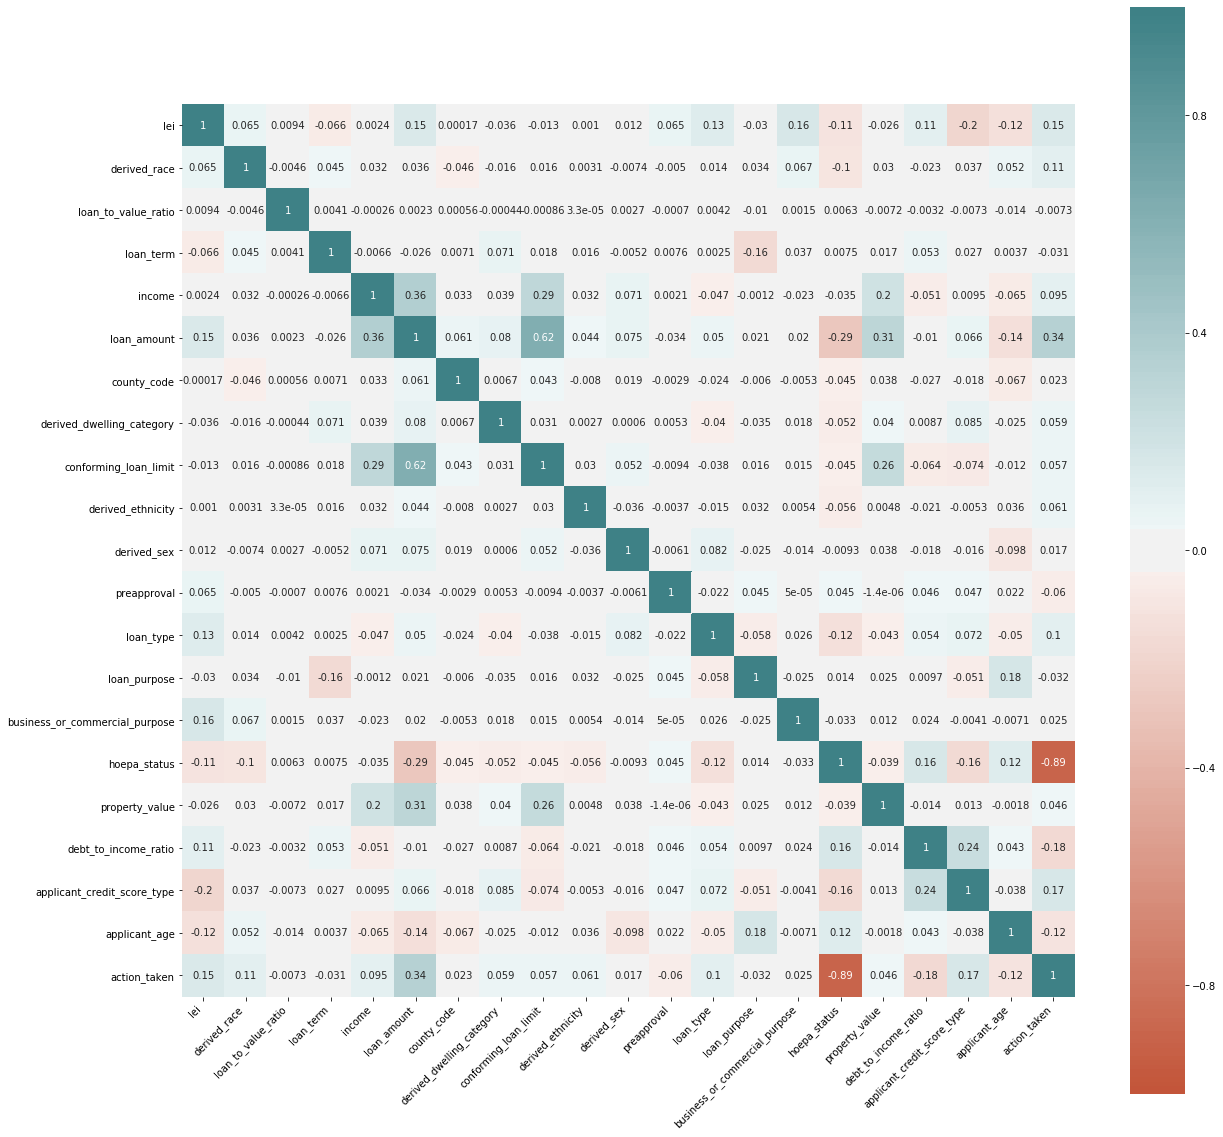

In [175]:
#Coorelation between Datatypes and Dependent Variable(Action_Taken)
corr = finance.corr()
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,200,n=200),square=True,annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

In [178]:
#Splitting the data into training and testing
X = finance.drop('action_taken',axis=1)
Y = finance.action_taken
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [179]:
## CASE 1# MLP(Multi-Layer Perceptron Classification - ANN) Classifier with all variables
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='relu')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("The predicted Values with all variables as input :" ,y_pred)
print(" Accuracy of MLC Classifier : ",clf.score(X_test,y_test)*100,"%")

The predicted Values with all variables as input : [1 1 1 ... 0 0 0]
 Accuracy of MLC Classifier :  78.92414729339895 %


C:\Users\Avi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [180]:
#Crosschecking accuracy through accuracy_score function
from sklearn.metrics import accuracy_score
accuracy = accuracy_score (y_test, y_pred)
print(" Crosscheck accuracy of MLP Model :",accuracy*100,"%")

 Crosscheck accuracy of MLP Model : 78.92414729339895 %


In [181]:
## CASE 2# Support Vector Classifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf3 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
print("The predicted Values with all variables as input :" ,y_pred)
print(" Accuracy of SVC MOdel : ",clf3.score(X_test,y_test)*100,"%")

The predicted Values with all variables as input : [1 0 0 ... 0 0 0]
 Accuracy of SVC MOdel :  96.29221109791278 %


# SVC performs Better than MLP Classifier here. We are choosing SVC as our optimal model.

In [182]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cf_matrix= confusion_matrix(y_test, y_pred)
cf_matrix

array([[4855,   85],
       [ 352, 6494]], dtype=int64)

In [183]:
#Code to make visualization graph of confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
  
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

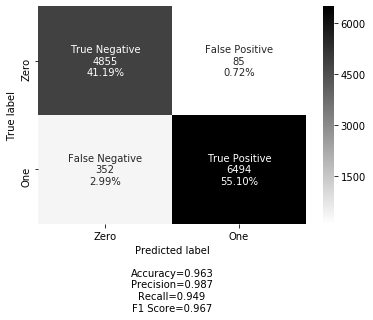

In [184]:
# Plot confusion matrix
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix,group_names=labels,categories=categories, cmap='binary')

In [185]:
#Now only considering the high correlated variables and doing dimensional reduction
X1 = finance[['lei','derived_race','loan_amount','income','loan_type',
               'hoepa_status','debt_to_income_ratio','applicant_credit_score_type','applicant_age']]
Y1= finance.action_taken
X_train,X_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.2)

In [198]:
#Reduced SVC Model
clf3.fit(X_train, y_train)
y_pred1 = clf3.predict(X_test)
print("The predicted Values with all variables as input :" ,y_pred1)
print(" Accuracy : ",clf3.score(X_test,y_test)*100,"%")

The predicted Values with all variables as input : [1 0 0 ... 1 0 0]
 Accuracy :  95.66434753096895 %


In [199]:
cf_matrix= confusion_matrix(y_test, y_pred1)
cf_matrix

array([[4845,   94],
       [ 417, 6430]], dtype=int64)

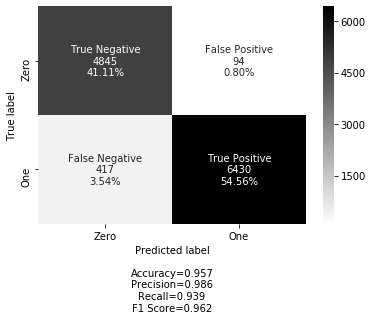

In [188]:
# Plot confusion matrix for reduced model
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix,group_names=labels,categories=categories, cmap='binary')

In [202]:
club = {'Actual Output': y_test, 'Predicted Output': y_pred}
comparison = pd.DataFrame(data= club,index=None)
comparison

,Actual Output,Predicted Output
546,1,1
24542,0,0
24432,0,0
21874,1,1
12220,1,0
8613,0,0
2938,1,1
31456,0,0
33501,1,1
936,1,0


# THANK YOU